<h2> ====================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 1: General Overview</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=====================================================</h2>

<h2> Lecture Outline</h2>

<ul>
    
  <li><b>Notation</b></li>
  <br>
  <li> <b>What is Machine/Statistical Learning?</b></li>
  <br>
  <li><b> Why's and How's of Estimating the Relationship Between <font color='red'> Predictors </font> and <font color='red'> Response</font></b></li>
  <br>
  <li> <b> Prediction Accuracy and Model Interpretability Trade-Off</b></li>
  <br>
  <li><b> Supervised vs. Unsupervised Models</b></li>
  <br>
  <li><b> Regression vs. Classification Models </b></li>
  <br>
  <li><b> Assesing Model Accuracy</b></li>
     <ol>
        <li> Mean Squared Error (MSE)</li>
        <li> Confusion Matrix</li>
        <li> ROC Curve </li>
        <li> Cross-Validation</li>  
     </ol>
   <br>
<li><b> Bias-Variance Trade-Off</b></li>

</ul>
 <hr>
 
 <hr>

<h2>Notation</h2>

<font size='3'>
<ul>
 
   <li> $X$: predictors, features, independent variables</li>
    <li> $Y$: response, target, dependent variable</li>
   <li> $p$: number of predictors</li>
        <li> $n$: number of samples </li>  

</ul>
</font>

<br>
<h2>What is Machine/Statistical Learning?</h2>
    <br>
    

 <font size='3'>
<p>
We will use the terms <i> Statistical Learning</i> and <i> Machine Learning</i> interchangeably.
 </p>
<ul>   
<li>Roughly spekaing, Machine Learning refers to a set of methods for estimating the systematic information that the <i> predictors/features</i>, denoted by <b>X</b>, provide about the <i> response</i>, denoted by <b>Y</b>.</li>
<li> Equivalently: it is a set of approaches for estimating the relationship between the <i> predictor variables </i> and the <i> response variable</i></li>
</ul>
     <br>
Specifically, suppose that we observe some quantitative response $Y$ and collect $p$ different features $X_1,\dots, X_p$ that we believe to be related to the response $Y$. Letting $X=(X_1,\dots, X_p)$ then we have 
    
$$Y=f(X)+\epsilon$$
    
 where $f$ represents the relationship or systematic information that the predictors $X$ provide about the response $Y$, and $\epsilon$ represents some random error term <b>independent</b> of $X-$ this stems from the fact that $Y$ may depend on other factors that are not among the $p$ features $X$. 
<br>

So, roughly speaking, Machine Learning refers to all the different methods of estimating this $f$.
<br>
     
We will illustrate this with some examples below.
  </font>


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

<h3> Mock Example 1</h3>

Let

<ul>
    <li>$Y$: be yearly income</li>
    <li> $X_1$: years of education post fith grade</li>
    <li>$X_2$: height of the person</li>
 </ul>

Suppose we are interested in 

<ul>
    <li>Predicting $Y$ based on $X=(X_1,X_2)$ and
    <li> Understading how each of $X_1$ and $X_2$ is related to and affects $Y$. 
  </ul>

<b>Remark:</b> Don't worry about the code for now.


In [9]:
# x=np.linspace(4,17,40)
# y=100/(1+np.exp(-x+10))+40
# y_noise=np.random.normal(0,15,40)
# x2=np.linspace(4,6.7,40)
# np.random.shuffle(x2)
# y_out=y+y_noise

In [10]:
# income=pd.DataFrame({"X1":x.round(3), 'X2':x2.round(3), 'Y':y_out})

In [11]:
#This is what the information about the first 10 people look like
income.head()

,X1,X2,Y
0,4.000,4.900,68.443765
1,4.333,6.008,37.107402
2,4.667,5.315,44.465165
3,5.000,5.523,47.065389
4,5.333,6.146,62.658630


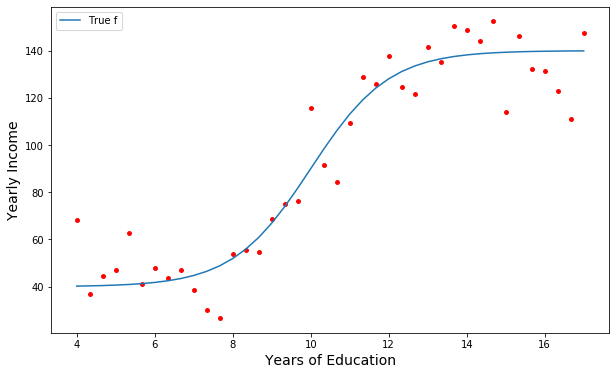

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(income['X1'],income['Y'],edgecolor='red',c='red',s=15)
plt.plot(x,y, label='True f')
plt.xlabel("Years of Education",fontsize=14)
plt.ylabel("Yearly Income",fontsize=14)
plt.legend(loc=2)
plt.show()

<font size='3'>Since, in this mock case, the <b>Income</b> is a simulated data set, we know precisely how years of education is related to the yearly income. In other words, we know exactly what the function $f$ is (the blue curve above). However, 
in practice $f$ is not known, and our goal will be to find a good estimate $\widehat f$ of $f$.</font>
<br>

Another important question that one often wants to answer in practice is which features are most strongly related to the response and would they make a good predictor? Are there any features that seem not to carry any information about $Y$ at all? If so, which? etc. etc. etc.

For example, in our mock case, <b> height</b> seems not to carry any information regarding the persons yearly income(it would be weird if it did!). See the plot beow.

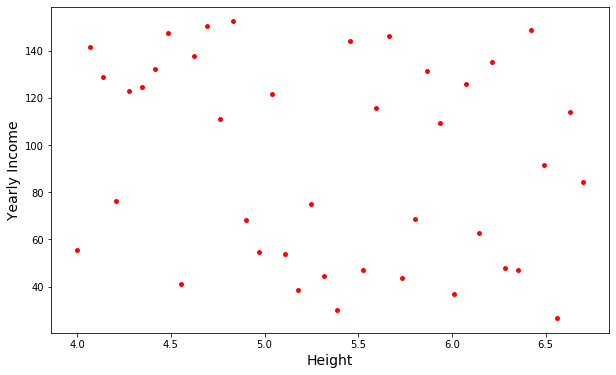

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(income['X2'],y_out, c='red', s=15)
plt.xlabel('Height',fontsize=14)
plt.ylabel("Yearly Income",fontsize=14)
plt.show()

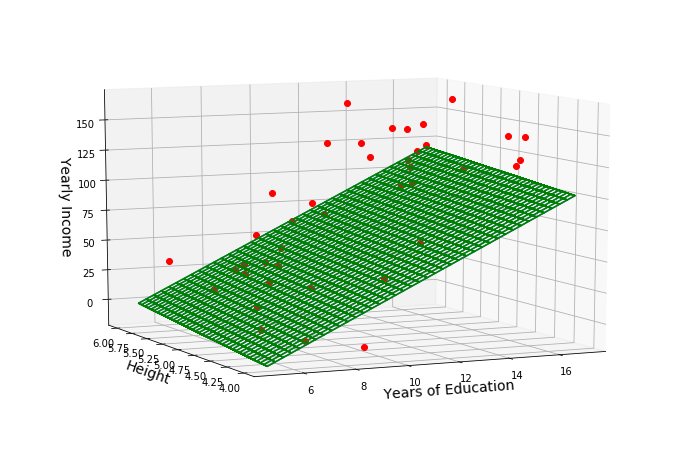

In [16]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection="3d")

def z_function(x1, x2):
    return 10*x1+8*x2-100

x1=np.linspace(5,17,40)
x2=np.linspace(4,6,40)

np.random.shuffle(x2)

X, Y = np.meshgrid(x1, x2)
Z = z_function(X, Y)

Y_target=100/(1+np.exp(-x+10))+30+np.random.normal(0,20,40)+np.sqrt(x2)


ax.plot_wireframe(X,Y,Z)

ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('Years of Education',fontsize=14)
ax.set_ylabel('Height',fontsize=14)
ax.set_zlabel('Yearly Income',fontsize=14)

for i in range(len(x1)):
    
    ax.plot([x1[i]],[x2[i]],[Y_target[i]],marker='o',color='r')

ax.set_xlabel('Years of Education',fontsize=14)
ax.set_ylabel('Height',fontsize=14)
ax.set_zlabel('Yearly Income',fontsize=14)

ax.view_init(10,245)
plt.show()



<h2> Why do we want to estimate $f$ ?</h2>


  Typically there are two main reasons why it is of interest to estimate $f$: <b> prediction</b> and <b>inference</b>.
  
  <ol style='list-style-type:square;'>
<font size='4'>
   <li><b>Prediction</b></li>
</font>    
  In many situations we can get a hold of the features for a particular target, but obtaining the value of the target variable is difficult and often impossible.
  
  For example, imagine you want to know whether a patient will have a severe adverse reaction to a particular drug. One, albeit very undesirable, way to figure that out is by administering the drug and observing the effect. However, if the patient has an adverse reaction which may cause damges, the hospital is liable for a lawsuit etc. So, you want to figure out a way to determine if the patient will have an adverse reaction to the drug based say on some blood characteristics, $X_1,\dots, X_p$. These blook markers may be readily obtained in the lab!
  
  So, in this case we may predict $Y$ by using $$\widehat Y=\widehat f(X)$$
  where $\widehat f$ is some estimate of $f$, and $\widehat Y$ is the resulting prediction for $Y$.
  
  How accurate our estimate $\widehat Y$ is depends on two factors
  
 <ul>
    <li><b> Reducible Error</b></li>

 This error stems from the fact that our estimate $\widehat f$ of $f$ may not be perfect. However,
 since we may potentially get a better estimate of $f$ via another method, this erros is called <b> reducible</b>, as it may be further reduced.
 
 <br><li><b>Irreducible Error</b></li>
   
 This error stems from the fact that there may be other features, outside of $X=(X_1,\dots, X_p)$ that we have not measured, but that may play an important role in predicting $Y$. In other words, even if we could find a perfect estimate $\widehat f$ of $f$, that is $\widehat Y=f(X)$, there will still be some inherent error in the model for the simple fact that the features $X_1,\dots, X_p$, that we have measured, are just not sufficient for a perfect prediction of $Y$.  
</ul>
  
Typically, when one is exclusively interested in prediction, then the specific form of $f$ is of little to no importance, and it is taken as a <b>black box</b>.
   
<font size='4'>   
<br><li><b> Inference</b></li>
</font>

 In practice we are often not so much interested in building the best prediction model, but rather in understanding specifically how $Y$ is affected as the features $X_1,\dots, X_p$ change. 
 
 In inference problems, the estimated $\widehat f$ may no longer taken as a black box, but rather needs to be understood well.
    
Some questions of interest that we would want to answer are as follows:
<ul>
  <li>Which predictors are associated with the response?</li>
    
  <li>What is the relationship between each response and the predictor? Positive, negative, more complex?</li>
  <li>Is the relationship between predictors and response linear or more complex?</li>
</ul>
 <br>
Discuss the <b> Income</b> and the <b> Drug Adverse Reaction</b> cases from this perspective.
</ol>



<h2> How is $f$ Estimated?</h2>

<br>

To estimate $f$ you need data...often a lot of data...that will train or teach our method how to estimate $f$. The data used to train our method is refered to as <b> training data</b>.

For example, if $x_i=(x_{i1},x_{i2},\dots, x_{in})$ for $i=1,2,\dots,n$ is the $i^{th}$ observation and $y_i$ the response associated with it, then the <b>training data </b> consists of 

$$\big\{(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)\big\}.$$

There is an ocean of linear and non-linear methods of estimating $f$. Overall, they can be split into two categories: <br><b> parametric</b> and <b> non-parametric</b> methods.


<ul> 
    
   <li><h3> Parametric Methods</h3></li>
<br>
   <b> Step 1:</b> Assume the form of $f$<br>
    
  For example, one of the simplest assumptions we can make is that $f$ is linear, that is:
  
  $$f(X)=\beta_0+\sum_{i=1}^n\beta_iX_i$$
  
  <b> Step 2:</b> Estimate the coefficients $\{\beta_i\}_{i=0}^n$
  
  Next, you need to use the training data and select a procedure to estimate the coefficients $\beta_0,\beta_1,\dots, \beta_n$; that is find $\widehat \beta_0,\dots,\widehat \beta_n$ such that $$\widehat Y=\widehat \beta_0+\sum_{i=1}^n\widehat \beta_i X_i$$
   
One of the main advantages of parametric methods is that the problem is transformed from estimating an arbitrary and unknown $f$ to estimating a set of parameters, which in general is much easier to do!

One of the main disadvantages of parametic methods is that the assumption that you make about the form of $f$ often may not closely match the true form of $f$, which will unavoidably lead in poor estimates.


<li><h3> Non-Parametric Methods</h3></li>
<br>


Non-parametric methods do not make any assumptions on the form of $f$, but rather try to estimate it by trying to approximate as closely and as smoothly as possible the training data.

One of the main advantages of non-parametric approaches is that because they do not make any assumptions on the form of $f$ they can accomodate a wide range of possibilities, and as such stand a better chance of approaching the true form of $f$.

One of the main disadvantages is that they typically require far more training data than parametric methods to successfully and correctly estimate $f$.
    

</ul>

<hr>
<hr>

<h2>***To Be Continued...***</h2>